In [ ]:
import sys, subprocess, pkgutil

def ensure(pkg):
  if pkg not in {m.name for m in pkgutil.iter_modules()}:
    subprocess.run([sys.executable, "-m", "pip", "install", pkg, "-q"], check=True)

# Core libraries for this lab
for p in ["numpy", "pandas", "matplotlib", "seaborn"]:
  ensure(p)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
sns.set_theme(context="notebook", style="whitegrid")

# New Section

In [ ]:
# 1. Create a random 4x4 array from an exponential distribution. Refer numpy functions.
A = np.random.exponential(scale=1.0, size=(4, 4))
A

array([[0.46926809, 3.01012143, 1.31674569, 0.91294255],
       [0.16962487, 0.16959629, 0.05983877, 2.01123086],
       [0.91908215, 1.23125006, 0.02079931, 3.50355748],
       [1.78642954, 0.23868763, 0.20067899, 0.20261142]])

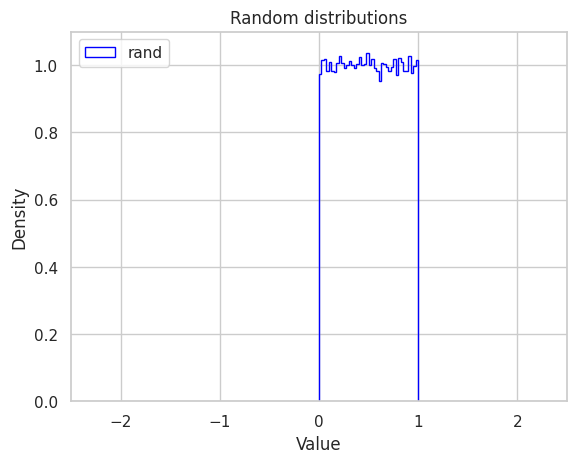

In [ ]:
""" 2. Create a random 100000x1 array from the same exponential distribution and visualize the
distribution histogram along with uniform and normal distributions."""
plt.hist(np.random.rand(100000), density=True, bins=40, histtype="step", color="blue", label="rand")
plt.axis([-2.5, 2.5, 0, 1.1])
plt.legend(loc = "upper left")
plt.title("Random distributions")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()







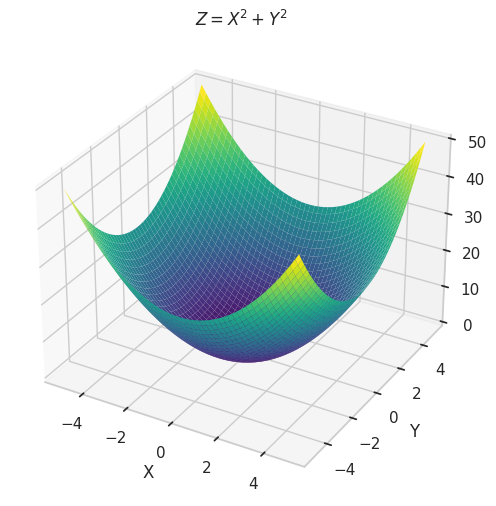

In [ ]:
# 3. Using matplotlib, plot the Z = X**2 + Y**2 in a 3D plot. Limit the x and y values to [-5, 5].
from matplotlib import cm

x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis, linewidth=0, antialiased=True)

ax.set_title(r"$Z = X^2 + Y^2$")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

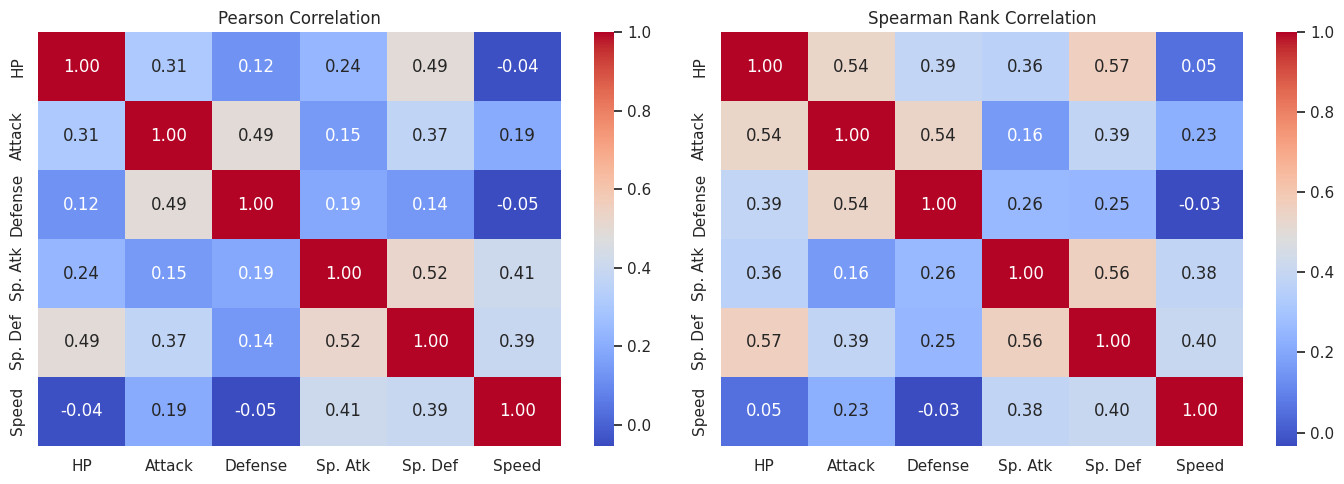

In [ ]:
# (Optional) choose inline backend; safe to omit in Colab
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get dataset
!wget -q https://elitedatascience.com/wp-content/uploads/2022/07/Pokemon.csv
df = pd.read_csv('Pokemon.csv', encoding='latin1')

# Columns we need (these exact names exist in this CSV)
cols = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
df_sub = df[cols].copy()

# Pearson and Spearman correlations
pearson  = df_sub.corr(method="pearson")
spearman = df_sub.corr(method="spearman")

# Heatmaps with values shown (annot=True)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.heatmap(pearson,  annot=True, fmt=".2f", cmap="coolwarm", ax=axes[0])
axes[0].set_title("Pearson Correlation")
sns.heatmap(spearman, annot=True, fmt=".2f", cmap="coolwarm", ax=axes[1])
axes[1].set_title("Spearman Rank Correlation")
plt.tight_layout()
plt.show()
